In [1]:
from math import sin, sqrt, exp, cos
import matplotlib.pyplot as plt
from rk8 import rk_error_control_perfect_first_step

In [2]:
def create_t_eval(start, end, num_points = 100):
    res = [start]
    h = (end - start)/(num_points - 1)

    for _ in range(num_points - 1):
        res.append(
            res[-1] + h
        )
    return res

In [3]:
def experiment(model, y0, t_span, solution):
    t_eval = create_t_eval(t_span[0], t_span[1])
    tol = 1e-6
    (res, sol, first_deriv, error_samplings, lower_sol, lower_error_samplings) = rk_error_control_perfect_first_step(model, t_span, y0[0], tol, solution)
    print("integration complete")

    # ====================================== figure of rk6 vs rk6_interps vs rk45
    # plt.figure()
    xs = [x[0] for x in res]
    # ys = [x[1] for x in res]
    # plt.plot(xs, ys, label="rk6")

    # plots of where the end of the steps occured to look at the interp
    # for this_x in xs:
    #     plt.axvline(x=this_x) 

    computed_solutions = [sol(x) for x in t_eval]
    lower_computed_solutions = [lower_sol.eval(x) for x in t_eval]
    # plt.plot(t_eval, computed_solutions, label="computed solution")

    actual_solutions = solution(t_eval)
    # plt.plot(t_eval, actual_solutions, label="actual solution")

    # removed rk45 plt.title("solution vs rk45 vs rk6 vs rk6_interpolated")
    # plt.title(f"actual solution vs interpolated solution tol={tol}")
    # plt.xlabel("t")
    # plt.ylabel('y')
    # plt.legend(loc="upper right")
    # plt.show()
    # ====================================== end figure of rk6 vs rk6_interps vs rk45

    # ====================================== global error
    plt.figure()
    error = [abs(computed_solution - actual_solution) for (computed_solution, actual_solution) in zip(computed_solutions, actual_solutions)]
    lower_error = [abs(lower_computed_solution - actual_solution) for (lower_computed_solution, actual_solution) in zip(lower_computed_solutions, actual_solutions)]
    # for this_x in xs:
    #     plt.axvline(x=this_x) 
    plt.plot(t_eval, error, label="higher_order")
    plt.plot(t_eval, lower_error, label="lower_order")
    # plt.title(f"global error for tol={tol}")
    plt.xlabel("t")
    plt.ylabel("error")
    plt.legend(loc="upper right")
    plt.show()
    # ====================================== end of global error

    # shape of errors - graphs
    plt.figure()
    for (x_i, x_i_plus_1, hb) in error_samplings:
        num_points = 100
        pts_to_sample = create_t_eval(x_i, x_i_plus_1, num_points)
        errors = []
        for i, pt in enumerate(pts_to_sample):
            y = solution([pt])[0]
            hb_eval = hb.eval(pt)
            error = abs(hb_eval - y)
            errors.append( error )

        maximum_error = max(errors)
        scaled_errors = [error / (maximum_error) for error in errors]

        # str_x_i = "{:.3f}".format(x_i)
        # str_x_i_plus_1 = "{:.3f}".format(x_i_plus_1)
        x_axis = [i/(num_points - 1) for i in range(num_points)]
        plt.plot(x_axis, scaled_errors, label=f"x_{str(x_i)}_{str(x_i_plus_1)}")
    plt.title("plot of shape of exact errors of HIGHER ORDER")
    plt.xlabel(r"$x_i$ to $x_{i+1}$")
    plt.ylabel('scaled exact errors')
    # plt.legend()
    plt.show()

    plt.figure()
    for (x_i, x_i_plus_1, hb) in lower_error_samplings:
        num_points = 100
        pts_to_sample = create_t_eval(x_i, x_i_plus_1, num_points)
        errors = []
        for i, pt in enumerate(pts_to_sample):
            y = solution([pt])[0]
            hb_eval = hb.eval(pt)
            error = abs(hb_eval - y)
            errors.append( error )

        maximum_error = max(errors)
        scaled_errors = [error / (maximum_error) for error in errors]

        # str_x_i = "{:.3f}".format(x_i)
        # str_x_i_plus_1 = "{:.3f}".format(x_i_plus_1)
        x_axis = [i/(num_points - 1) for i in range(num_points)]
        plt.plot(x_axis, scaled_errors, label=f"x_{str(x_i)}_{str(x_i_plus_1)}")
    plt.title("plot of shape of exact errors of LOWER ORDER")
    plt.xlabel(r"$x_i$ to $x_{i+1}$")
    plt.ylabel('scaled exact errors')
    # plt.legend()
    plt.show()

    plt.figure()
    for ((x_i, x_i_plus_1, lower_hb), (_, _, higher_hb)) in zip(lower_error_samplings, error_samplings):
        num_points = 100
        pts_to_sample = create_t_eval(x_i, x_i_plus_1, num_points)
        errors = []
        for i, pt in enumerate(pts_to_sample):
            lower_hb_eval  = lower_hb.eval(pt)
            higher_hb_eval = higher_hb.eval(pt)
            error = abs(lower_hb_eval - higher_hb_eval)
            errors.append( error )

        maximum_error = max(errors)
        scaled_errors = [error / (maximum_error) for error in errors]

        # str_x_i = "{:.3f}".format(x_i)
        # str_x_i_plus_1 = "{:.3f}".format(x_i_plus_1)
        x_axis = [i/(num_points - 1) for i in range(num_points)]
        plt.plot(x_axis, scaled_errors, label=f"x_{str(x_i)}_{str(x_i_plus_1)}")
    plt.title("plot of shape of ESTIMATED errors between interpolants")
    plt.xlabel(r"$x_i$ to $x_{i+1}$")
    plt.ylabel('scaled estimated errors')
    # plt.legend()
    plt.show()

    for (x, y) in res:
        print(abs(y - solution([ x ])[0]))

tolerance= 1e-06
Monitor8
alpha values [0.9999999999999998, 1.0, 0.4999999999999997, 0.5000000000000003, 1.0000000000000007, 0.5]
beta values [0.9999999999999994, 1.0000000000000002, 2.0000000000000004, 2.0000000000000013, 1.999999999999999, 1.0, 2.0]
n_steps 16
n_successful_steps 14


Monitor10
alpha values [0.9999999999999994, 1.9999999999999984, 2.0000000000000004, 2.0, 1.0000000000000007, 2.0000000000000013, 0.9999999999999989, 1.9999999999999978, 1.0]
beta values [1.999999999999999, 2.0, 2.0000000000000013, 3.9999999999999956, 4.000000000000001, 4.000000000000003, 1.9999999999999978]
n_steps 0
n_successful_steps 0

integration complete


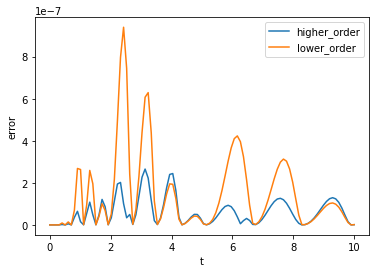

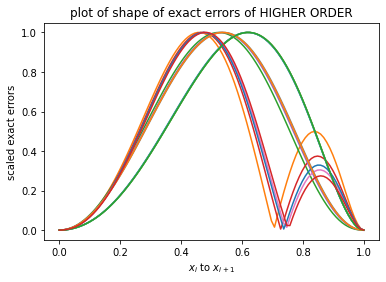

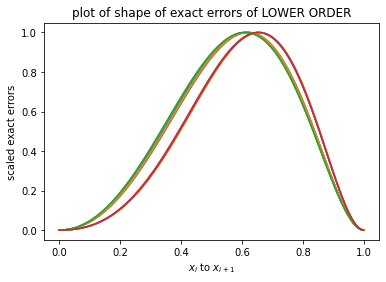

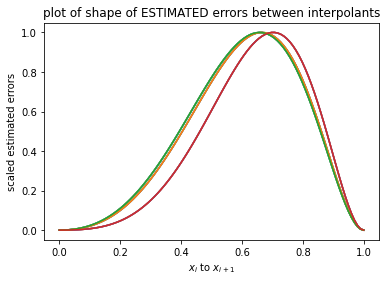

0.0
0.0
0.0
4.440892098500626e-16
5.861977570020827e-14
6.317169010117141e-14
2.6136870445725435e-12
2.345124094915718e-12
1.9378942894832107e-12
9.593881244995828e-12
7.957245973244653e-12
6.3453131637913884e-12
5.1633142206242155e-12
7.260969603350986e-12
5.8576477002247884e-12
4.678202270014253e-12
1.0579537246258042e-11


In [4]:
t_span_1 = [0, 10]
y0_1 = [1]

def model1(t, y):
    return [(-1/2) * y**3]

def solution1(t):
    return [1/sqrt(1+x) for x in t]

experiment(model1, y0_1, t_span_1, solution1)

tolerance= 1e-06
Monitor8
alpha values [0.9999999999999998, 1.0, 0.4999999999999997, 0.5000000000000003, 0.5, 1.0000000000000007]
beta values [0.9999999999999994, 1.0000000000000002, 2.0, 2.0000000000000013, 1.999999999999999, 1.0]
n_steps 21
n_successful_steps 17


Monitor10
alpha values [0.9999999999999989, 1.9999999999999984, 2.0000000000000004, 2.0, 1.9999999999999978, 1.0000000000000007, 1.0, 2.000000000000002, 2.0000000000000036]
beta values [1.9999999999999978, 2.0, 2.0000000000000013, 3.9999999999999956, 4.0, 4.000000000000003, 2.000000000000002, 4.000000000000007]
n_steps 0
n_successful_steps 0

integration complete


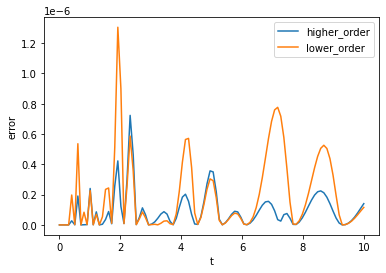

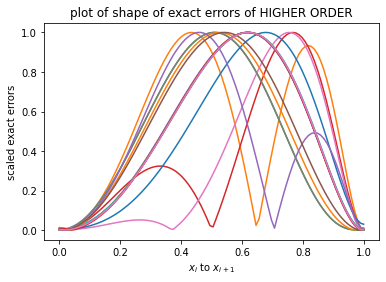

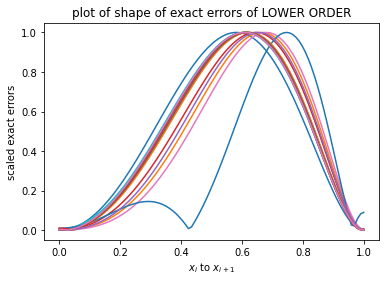

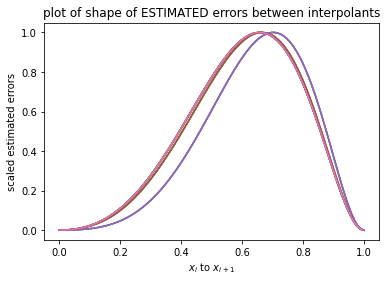

0.0
0.0
0.0
2.942091015256665e-14
1.8821832981075204e-11
2.7069790853317954e-11
2.6256774532384952e-11
2.1588897336499713e-11
1.6381895839856497e-11
1.1296761859291848e-09
7.642156352183349e-10
4.5734890874449263e-10
2.7800972635105836e-10
2.590208450503617e-09
1.4029083797439945e-09
7.663183629325054e-10
4.468527527168309e-10
9.742492021458382e-10
5.070641389409714e-10
2.747763457738861e-10


In [5]:
t_span_2 = [0, 10]
y0_2 = [1]

def model2(t, y):
    return [-2*t*y**2]

def solution2(t):
    return [1/(1+x**2) for x in t]

experiment(model2, y0_2, t_span_2, solution2)

tolerance= 1e-06
Monitor8
alpha values [0.9999999999999998, 1.0, 0.49999999999999994, 0.4999999999999999, 0.5000000000000003, 0.5000000000000001, 1.0000000000000002]
beta values [0.9999999999999998, 1.9999999999999998, 1.0000000000000002, 2.0000000000000004, 1.999999999999999, 1.0, 2.0, 2.0000000000000013]
n_steps 15
n_successful_steps 10


Monitor10
alpha values [0.9999999999999994, 1.9999999999999984, 2.0000000000000004, 0.9999999999999998, 1.0000000000000007, 0.9999999999999999, 2.0, 1.9999999999999978]
beta values [1.9999999999999996, 2.0000000000000013, 3.9999999999999996, 3.9999999999999956, 4.000000000000001, 3.999999999999999, 3.9999999999999982, 4.000000000000003, 2.0, 4.0, 1.9999999999999978]
n_steps 0
n_successful_steps 0

integration complete


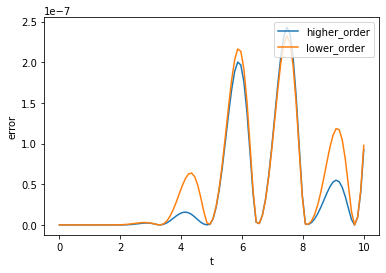

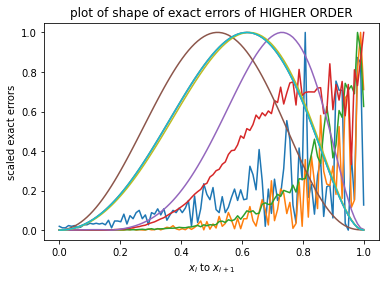

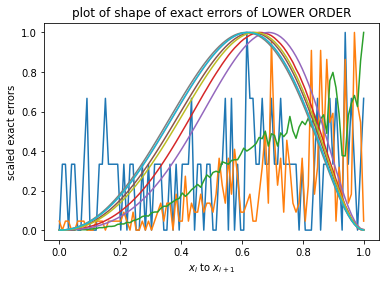

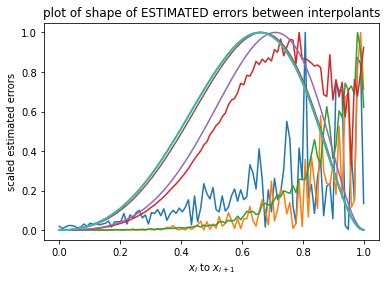

0.0
0.0
0.0
2.220446049250313e-16
2.220446049250313e-16
2.220446049250313e-16
1.84297022087776e-14
7.847056338050606e-12
1.5584866730478097e-11
2.1224799695573893e-11
2.2220447704057733e-11
1.3371526108585385e-11
9.876544027065393e-12


In [6]:
t_span_3 = [0, 10]
y0_3 = [1]

def model3(t, y):
    return [(1/4)*y*(1 - y/20)]

def solution3(t):
    return [20 / ( 1 + 19 * exp(-x/4) ) for x in t]

experiment(model3, y0_3, t_span_3, solution3)

tolerance= 1e-06
Monitor8
alpha values [0.5, 1.0, 0.9999999999999978, 1.0000000000000022, 1.0000000000000044, 0.9999999999999911, 1.0000000000000089, 7.999999999999994, 3.999999999999929, 2.0, 0.5000000000000089, 2.000000000000142, 4.000000000000284, 0.4999999999999645, 0.9999999999999822]
beta values [0.4999999999999999, 1.0000000000000002, 0.24999999999999994, 0.1250000000000001, 1.0, 2.0, 1.9999999999999978, 0.9999999999999978, 1.0000000000000022, 0.9999999999999956, 1.0000000000000089, 0.5, 1.9999999999999645, 1.0000000000000178, 2.000000000000142, 0.5000000000000089, 0.4999999999999645, 0.25000000000000444, 0.24999999999998224, 0.9999999999999911]
n_steps 474
n_successful_steps 408


Monitor10
alpha values [0.9999999999998579, 1.0, 2.0000000000000004, 2.0, 2.000000000000009, 1.9999999999999867, 1.9999999999999911, 1.9999999999999645, 1.9999999999999822, 2.0000000000000355, 7.999999999999858, 4.000000000000284, 1.999999999999858, 2.000000000000142, 1.0000000000000355, 15.9999999999

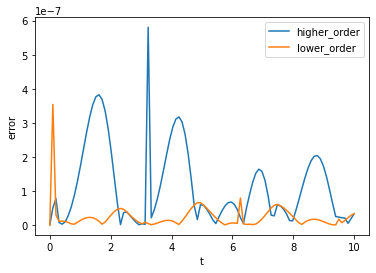

In [7]:
t_span_4 = [0, 10]
y0_4 = [0]

def model4(t, y):
    return [100 * (sin(t) - y)]
    # return [10 * (sin(t) - y)]

def solution4(t):
    return [( 100 * ( exp(-100 * x) - cos(x) ) +  10000 * sin(x) ) / 10001 for x in t]
    # return [( 10 * ( exp(-10 * x) - cos(x) ) +  100 * sin(x) ) / 101 for x in t]

experiment(model4, y0_4, t_span_4, solution4)

In [ ]:
t_span_5 = [0, 10]
y0_5 = [2]

def model5(t, y):
    return [(15 * cos(10 * t))/y]

def solution5(t):
    return [sqrt(3*sin(10*x) + 4) for x in t]

experiment(model5, y0_5, t_span_5, solution5)

In [ ]:
t_span_6 = [0, 10]
y0_6 = [1]

def model6(t, y):
    return [-y/(t+1)]

def solution6(t):
    return [1/(x+1) for x in t]

experiment(model6, y0_6, t_span_6, solution6)

In [ ]:
t_span_7 = [0, 10]
y0_7 = [1]

def model7(t, y):
    alpha = 0.1
    return [ -alpha*y - exp(-alpha*t)*sin(t)]

def solution7(t):
    alpha = 0.1
    return [exp(-alpha*x)*cos(x) for x in t]

experiment(model7, y0_7, t_span_7, solution7)

In [ ]:
t_span_11 = [0, 10]
y0_11 = [1]

def model11(t, y):
    return [-2*y + t]

def solution11(t):
    return [1/4 * (-1 + 5 * exp(-2 * x) + 2 * x) for x in t]

experiment(model11, y0_11, t_span_11, solution11)

In [ ]:
# THE PROBLEMS BELOW CANNOT BE DONE YET
# CANNOT BE DONE AS MY CURRENT rk6 does not handle a vector for the ys
### ======================================================================


# Jeff cash test set first one

# t_span_8 = [0, 10]
# eps = 0.1
# a = exp(-1/eps)
# y0_8 = [1, a/(eps*(-1+a))]

# def model8(t, y):
#     return [y[1], y[0]/eps]

# def solution8(t):
#     # THE experiment method calculates error on "computed[0]"
#     # so we can only verify the error of y[0] there
#     return [(1-exp(x/eps)*a)/(1-a) for x in t]

# experiment(model8, y0_8, t_span_8, solution8)

# ## the results were extremely bad. So i wanted to see the solution
# plt.figure()
# plt.plot(t_span_8, solution8(t_span_8))



In [ ]:
# Jeff cash test set second one
# t_span_9 = [0, 10]
# eps = 0.1
# y0_9 = [1, -1/sqrt(eps)]

# def model9(t, y):
#     return [y[1], (y[0] + y[0]**2 - exp(-2*t/sqrt(eps)))/eps]

# def solution9(t):
#     # THE experiment method calculates error on "computed[0]"
#     # so we can only verify the error of y[0] there
#     return [exp(-x/sqrt(eps)) for x in t]

# experiment(model9, y0_9, t_span_9, solution9)

In [ ]:
# Wolfram Alpha first problem

# t_span_10 = [0, 10]
# y0_10 = [1, 2]

# def model10(t, y):
#     return [y[1], -3*y[0] + 2*cos(4*t)]

# def solution10(t):
#     # THE experiment method calculates error on "computed[0]"
#     # so we can only verify the error of y[0] there
#     s = sqrt(3)
#     return [(26*s*sin(s*x) - 6*cos(4*x) + 45*cos(s*x))/39 for x in t]

# experiment(model10, y0_10, t_span_10, solution10)